# The Heat Equation

We want to compute the 1D soluton of the heat equation. This is a partial differential equation (PDE) given by:

$$\frac{\partial  T}{\partial t} = \chi \frac{\partial ^ 2 T}{\partial x ^2}$$

We need to specify the boundary conditons. In our particular case we are going to choose that is zero at the boundaries for $x = [0, L]$:

$$T(0, t) = T(L, t) =0$$

We also need to specify the conditions at $t=0$. 

$$T(x,0) = f_0(x) = \sin(\frac{\pi x}{L})$$

## Finite Difference Method

Finite difference are numerical methods to solve partial differential equations. The idea is to approximate the solution discreatizing the problem, i.e. replace continuous derivatives with formulas that involve only the discrete values $\Delta x$ and $\Delta t$. The finite difference method obtains an approximate solution for $T(x, t)$ at a finite set of x and t. 

### Mesh
The mesh is the set of locations where the discrete solution is computed. The $\Delta x$ represents the local distance between adjacent points in space, and $\Delta $t the local distance between adjacent time steps.

### Forward Time, Centered Space

We approximate the equation with a *forward difference* that only involves f at $x = x_i$:

$$\frac{\partial T(x,t)}{\partial t} \bigg |_{t_{m+1}, x_i}  = \frac {f_i ^{m+1} - f_i^{m}    }  {\Delta t} + \mathcal O (\Delta t)  $$

To approximate the term $(\partial ^2 f / \partial x ^2 )_{x_i}$ we use the central difference approximation and evaluate at time m:

$$\frac{\partial ^2 T(x,t)}{\partial x ^2} \bigg |_{x_i}  = \frac {f_{i-1} ^{m} - 2f_i^{m} + f^m_{i+1}    }  {\Delta t} + \mathcal O (\Delta x^2)  $$


We substitute in the heat equation and get:


$$\frac {f_i ^{m+1} - f_i^{m}    }  {\Delta t} = \chi \, \frac {f_{i-1} ^{m} - 2f_i^{m} + f^m_{i+1}    }  {\Delta t} + \mathcal O (\Delta x^2) + \mathcal O (\Delta t)$$

We solve for $f^{m+1}_i$ and get:

$$  f^{m+1} _ i = f^m _i + \frac{\chi \Delta t}{\Delta x ^2} \left ( f^m _{i+1} - 2 f^m _ i + f ^ m _{i-1} \right ) $$


The last equation is called the *Forward Time, Centered Space* or FTCS approximation of the heat equation. 

## The Courant-Friedrichs-Lewy (CLF) condition:

The CLF is a necessary condition for convergence. In our case we have a variable CFL given by:

$$\text{CFL}=\frac{\chi \Delta t}{\Delta x ^2} < \frac{1}{2}$$

The equation to solve for $f^{m+1}_i$  gets the form:

$$  f^{m+1} _ i = \text{CFL} \cdot f^m_{i+1} + (1-2 \cdot \text{CFL}) f^m _i + \text{CFL} \cdot f^m _{i-1}$$






### Include references----

## Python Implementation

We first decide our boundaries for t and x, our CFL for stability, the radiative diffusion $\chi$, and the number of gridpoints, N. 

Then given L and N the spacing $dx$ between the $x_i$ is computed with:
$$\Delta x = \frac{L}{N-1}$$

Similary for the discrete time we have:

$$ \Delta t = \frac{t_{max}}{M-1} $$ 

In our case we define a CFL and we get a the $\Delta t$:

$$ \Delta t = CFL \cdot (\Delta x)^2 $$

and we get the number of intererations:

$$M = nt = \frac{t_{max}}{\Delta t} +1$$

In Python this is:

In [103]:
cfl  =  0.25 # Courant-Friedrichs-Lewy condition
L    = 1 # x= [0, L]
N    = 100 #Gridpoints
chi  = 1 #Radiative diffusion
tend = 0.1 #Final time step

dx = L/(N-1.)
dt = cfl*(dx)**2
nt = int(tend/dt)+1
print "CFL=%5.2f tend=%4.1f --> %i iteratiobns en temps"%(cfl,tend,nt)

CFL= 0.25 tend= 0.1 --> 3921 iteratiobns en temps


Now we define the initial conditions at time zero. We create our vectors x and T0 in Python. 

$$T(x,0) = f_0(x) = \sin(\frac{\pi x}{L})$$

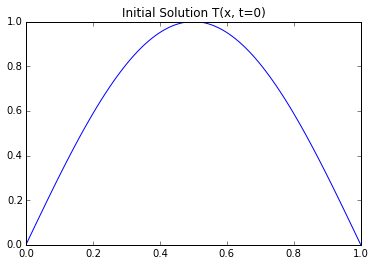

In [92]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#
# solution initiale T0(x,t=0)
#
x=np.linspace(0,L,N)
T0=np.sin((np.pi*x)/L)
plt.plot(x,T0,label='initial u')
plt.title('Initial Solution T(x, t=0)')
plt.show()

Now we do the loop:
    $$  f^{m+1} _ i = \text{CFL} \cdot f^m_{i+1} + (1-2 \cdot \text{CFL}) f^m _i + \text{CFL} \cdot f^m _{i-1}$$

We need an outer loop for all the time steps and an inner loop of the space. We can optimize the code by using the function roll from the numpy package and only need the outer time loop. 

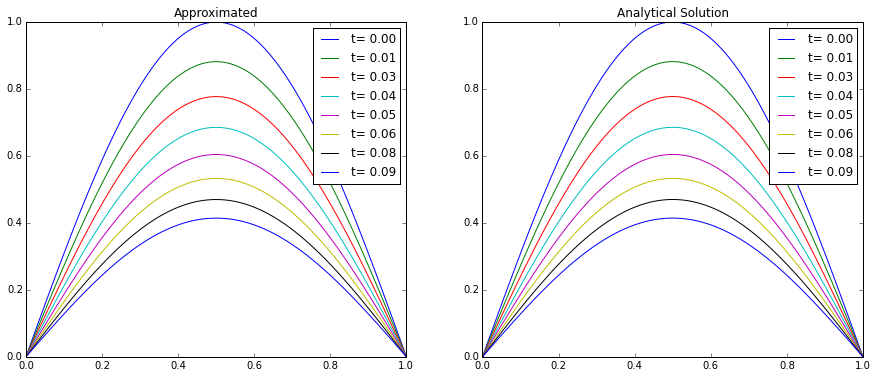

In [121]:
#
# avancement en temps u(x,t)
#
t=0. ; u=np.copy(T0)
plt.figure(figsize=(15, 6))
for i in range(0,nt):
    uold = u
    #u= cfl*np.roll(uold,-1)+(1-2*cfl)*uold+ cfl*np.roll(uold,1)
    u[1:N-1] = cfl*uold[0:N-2] + (1-2*cfl)*uold[1:N-1] + cfl*uold[2:N]
    uexacte= np.sin((np.pi*x)/L)*np.exp(-(chi*np.pi**2*t)/(L**2))
    t=t+dt 
    if (i % 500 == 0):  #Plot every 500 interations
        st="t=%5.2f"%t

        plt.subplot(1, 2, 1)
        plt.plot(x,u,label=st)
        plt.title('Approximated')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.title('Analytical Solution')
        plt.plot(x,uexacte,label=st)
        plt.legend()

We can now compare to the analytical solution:

$$T(x,t) = \sin(\frac{\pi x}{L}) \exp(-\frac{\chi \pi ^2 t}{L^2})$$

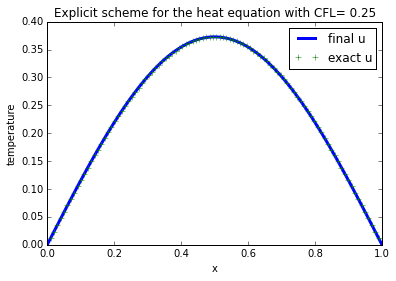

In [123]:
#
# comparaison avec la solution analytique au temps final
#
t=tend
uexacte= np.sin((np.pi*x)/L)*np.exp(-(chi*np.pi**2*t)/(L**2))

plt.plot(x,u,label='final u',lw=3)
plt.plot(x,uexacte,'+',label='exact u')
plt.xlabel('x')
plt.ylabel('temperature')
plt.title('Explicit scheme for the heat equation with CFL=%5.2f'%cfl)
plt.legend(loc='best')

plt.show()

# Implicit Shema

This can be express in matrix form: